In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential, datasets, layers, models, Input
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf

## Questão 1.1

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 367,712 (1.40 MB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 245,142 (957.59 KB)

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8816 - loss: 0.4119 - val_accuracy: 0.9620 - val_loss: 0.1239
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9679 - loss: 0.1068 - val_accuracy: 0.9699 - val_loss: 0.0999
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9782 - loss: 0.0698 - val_accuracy: 0.9736 - val_loss: 0.0820
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9831 - loss: 0.0544 - val_accuracy: 0.9733 - val_loss: 0.0841
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9871 - loss: 0.0388 - val_accuracy: 0.9759 - val_loss: 0.0798
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9889 - loss: 0.0350 - val_accuracy: 0.9774 - val_loss: 0.0827
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9910 - loss: 0.0267 - val_accuracy: 0.9780 - val_loss: 0.0863
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9940 - los

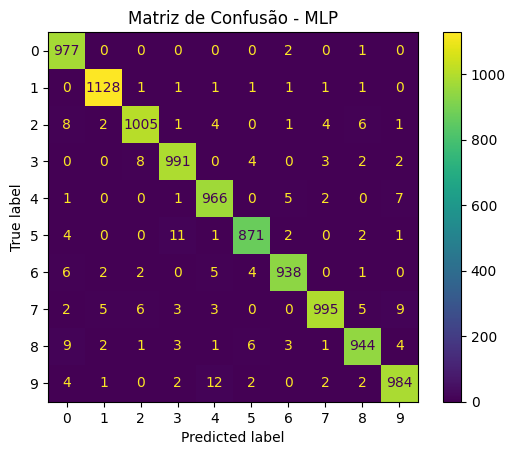

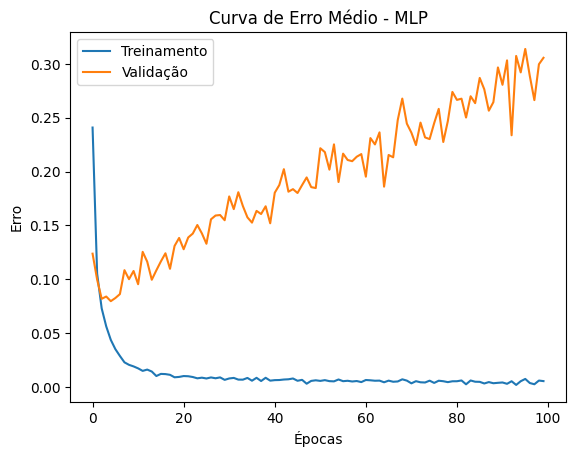

In [ ]:
# dados MNIST direto da biblioteca do keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# normalização
x_train = x_train / 255.0
x_test = x_test / 255.0

# MLP
model_mlp = Sequential([
    Input(shape=(28, 28)),
    Flatten(),  # achata as imagens 28x28 para vetores de 784 elementos
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes para os dígitos de 0 a 9
])

model_mlp.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
model.summary()
history_mlp = model_mlp.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

mlp_loss, mlp_acc = model_mlp.evaluate(x_test, y_test)

# matriz de confusão
y_pred_mlp = np.argmax(model_mlp.predict(x_test), axis=-1)
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
ConfusionMatrixDisplay(cm_mlp, display_labels=np.arange(10)).plot()
plt.title('Matriz de Confusão - MLP')
plt.show()

# curva de erro médio
plt.plot(history_mlp.history['loss'], label='Treinamento')
plt.plot(history_mlp.history['val_loss'], label='Validação')
plt.title('Curva de Erro Médio - MLP')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.legend()
plt.show()


## Questão 1.2

In [ ]:
# Reshape dos dados para a CNN
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

# Definir a CNN
model_cnn = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar o modelo
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Treinar a rede
history_cnn = model_cnn.fit(x_train_cnn, y_train, epochs=100, validation_data=(x_test_cnn, y_test))

# Avaliar o desempenho da CNN
cnn_loss, cnn_acc = model_cnn.evaluate(x_test_cnn, y_test)

# Gerar a matriz de confusão
y_pred_cnn = np.argmax(model_cnn.predict(x_test_cnn), axis=-1)
cm_cnn = confusion_matrix(y_test, y_pred_cnn)
ConfusionMatrixDisplay(cm_cnn, display_labels=np.arange(10)).plot()
plt.title('Matriz de Confusão - CNN')
plt.show()

# Curva de erro médio
plt.plot(history_cnn.history['loss'], label='Treinamento')
plt.plot(history_cnn.history['val_loss'], label='Validação')
plt.title('Curva de Erro Médio - CNN')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.9132 - loss: 0.2853 - val_accuracy: 0.9872 - val_loss: 0.0398
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9859 - loss: 0.0429 - val_accuracy: 0.9874 - val_loss: 0.0362
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9916 - loss: 0.0271 - val_accuracy: 0.9903 - val_loss: 0.0312
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9935 - loss: 0.0210 - val_accuracy: 0.9908 - val_loss: 0.0291
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9955 - loss: 0.0144 - val_accuracy: 0.9886 - val_loss: 0.0379
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9968 - loss: 0.0107 - val_accuracy: 0.9892 - val_loss: 0.0390
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 32ms/step - accuracy: 0.9973 - loss: 0.0083 - val_accuracy: 0.9906 - val_loss: 0.0344
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 

## Questão 2

In [ ]:
# Carregar o dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalizar os valores dos pixels para estar entre 0 e 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Classes do CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Definir o modelo Sequential
model = models.Sequential()

# Adicionar camadas convolucionais e pooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Adicionar camadas densas (fully connected)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 classes para CIFAR-10

# Compilar o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Resumo do modelo
model.summary()

# Treinar o modelo
history = model.fit(x_train, y_train, epochs=100,
                    validation_data=(x_test, y_test))

# Plotar a curva de erro médio (loss)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Curva de Erro Médio')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Fazer previsões no conjunto de teste
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plotar a matriz de confusão
disp.plot(cmap=plt.cm.Blues)
plt.show()

